### CUSTOMER CHURN PREDICTION

### DATA CLEANING, TRANSFORMATION AND PREPROCESSING

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#import and read dataset
churn_data= pd.read_csv("C:\\Users\\USER\\Desktop\\datasets\\customer churn prediction\\telco_customer_churn.csv")
churn_data.head(5) 

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#check shape(number of rows and columns) of the dataset
churn_data.shape

(7043, 21)

In [5]:
churn_data.columns.values

array(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
#check data types of all columns
churn_data.dtypes

customerID           object
Gender               object
SeniorCitizen        object
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#convert TotalCharges data type to numeric
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors = 'coerce')

In [8]:
churn_data.dtypes

customerID           object
Gender               object
SeniorCitizen        object
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
#check number of duplicated rows
churn_data.duplicated().sum()

0

In [10]:
churn_data.isnull().sum()

customerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
# drop rows with any null values
churn_data.dropna(inplace = True)

In [12]:
churn_data.isnull().sum()

customerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
len(churn_data[churn_data['Churn'] == "Yes"])/len(churn_data)

0.26578498293515357

In [14]:
churn_data['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [15]:
#check the descriptive statistics of numeric variables
churn_data.describe()

,Tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [16]:
churn_data['MonthlyCharges'].median()

70.35

In [17]:
churn_data['TotalCharges'].mean()

2283.300440841866

50% of the customers have tenure of 29 months or less

50% of the customers pay monthly charges of USD 70 or less

50% of customers have paid total charges of USD 1397 or less

Customers pay average monthly charges and total charges of USD 64.76 and USD 2283.30 respectively.

In [18]:
#find percentage of churners and non-churners
churn_data['Churn'].value_counts()/len(churn_data['Churn']) * 100

Churn
No     73.421502
Yes    26.578498
Name: count, dtype: float64

73.5% and 26.5% of the customers are non-churners and churners respectively

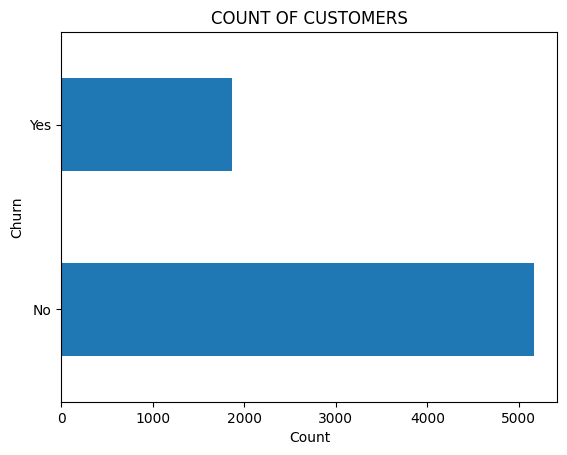

In [19]:
churn_data['Churn'].value_counts().plot(kind= 'barh')
plt.xlabel("Count")
plt.ylabel("Churn")
plt.title('COUNT OF CUSTOMERS');

Group customers into bins based on tenure

Group in 12, ie 12 months = 1 year

In [20]:
#get the maximum tenure
max(churn_data['Tenure'])

72

In [21]:
#get the minimum tenure
min(churn_data['Tenure'])

1

In [22]:
bins = [0,12,24,36,48,60,max(churn_data['Tenure'])]
bins

[0, 12, 24, 36, 48, 60, 72]

In [23]:
labels = ['less than 1 year', '1-2 years', '2-3 years','3-4 years','4-5 years','5+ years']
labels

['less than 1 year',
 '1-2 years',
 '2-3 years',
 '3-4 years',
 '4-5 years',
 '5+ years']

In [24]:
churn_data['tenure_grouped'] = pd.cut(churn_data['Tenure'],bins=bins, labels=labels)
churn_data

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grouped
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,less than 1 year
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2-3 years
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,less than 1 year
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3-4 years
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,less than 1 year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,1-2 years
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,5+ years
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,less than 1 year
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,less than 1 year


In [25]:
churn_data['tenure_grouped'].value_counts()

tenure_grouped
less than 1 year    2175
5+ years            1407
1-2 years           1024
2-3 years            832
4-5 years            832
3-4 years            762
Name: count, dtype: int64

Remove columns not required for analysis

In [26]:
#drop column customerID 
churn_data.drop(['customerID'], axis=1, inplace= True)
churn_data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grouped
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,less than 1 year
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2-3 years
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,less than 1 year
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3-4 years
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,less than 1 year


### DATA EXPLORATION

Plot distribution of individual predictors by churn

#### Univariate Analysis

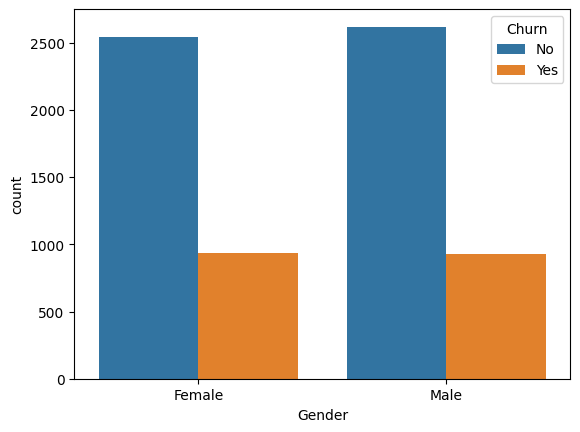

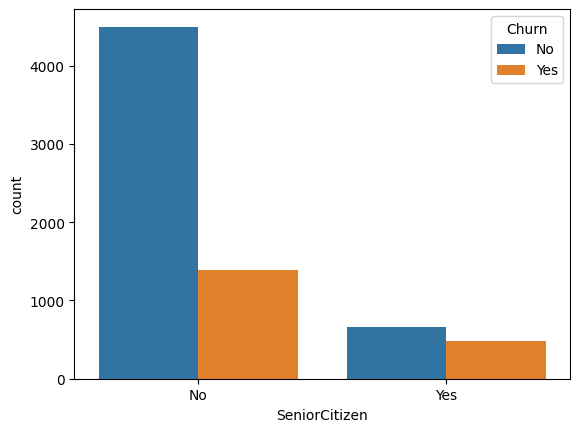

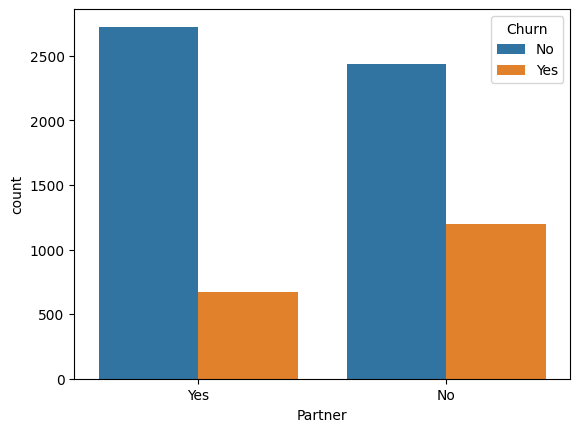

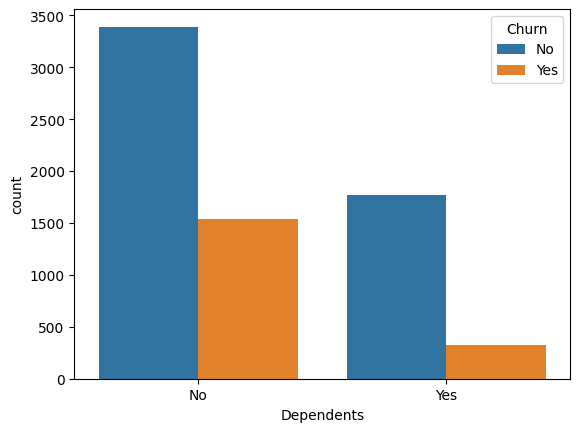

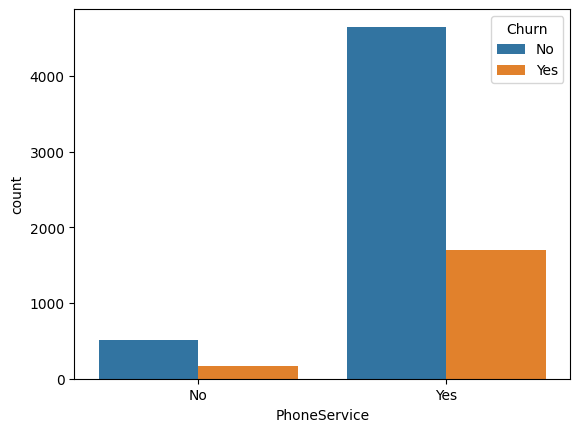

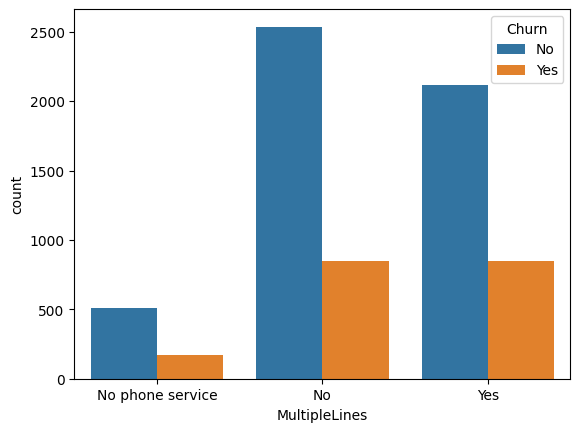

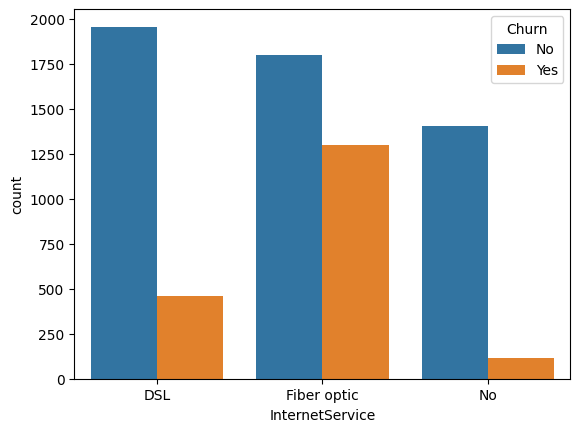

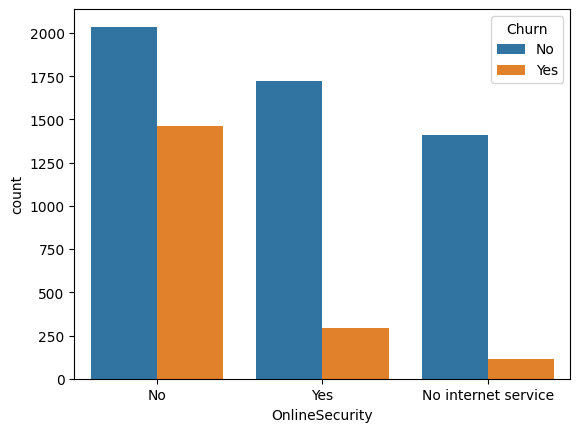

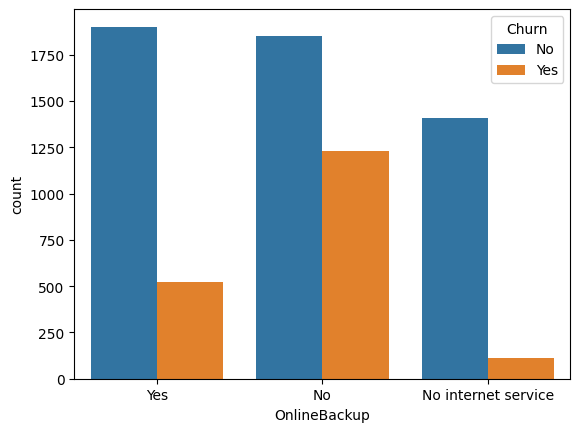

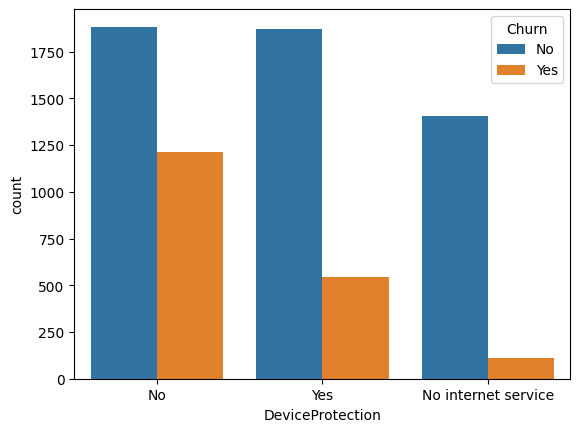

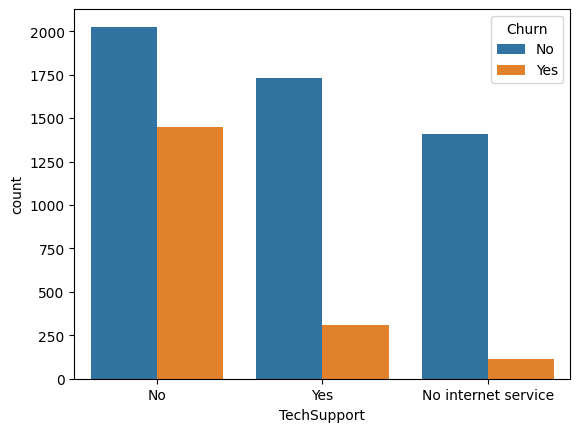

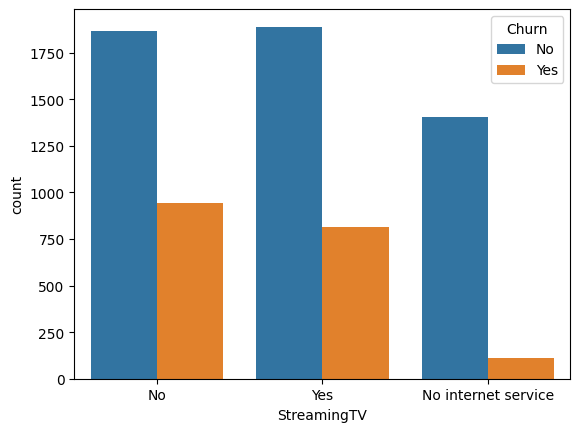

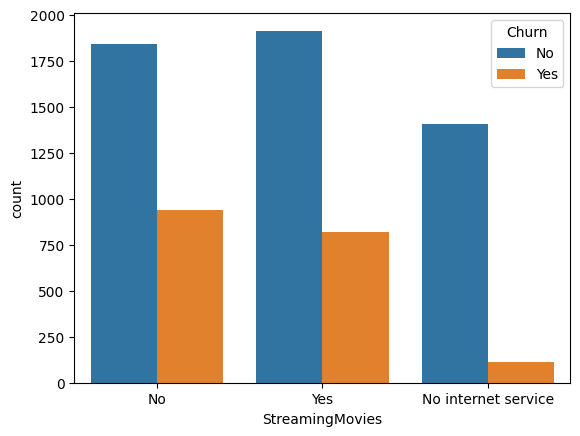

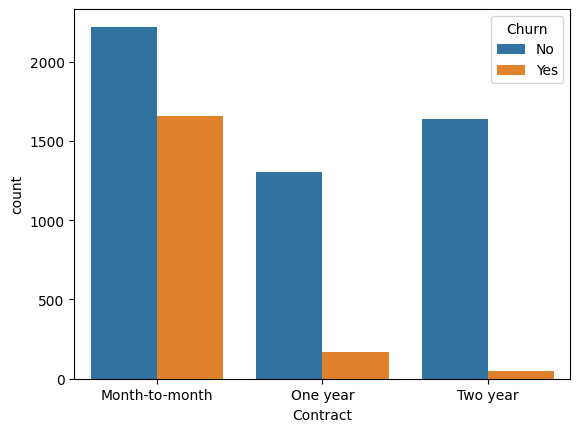

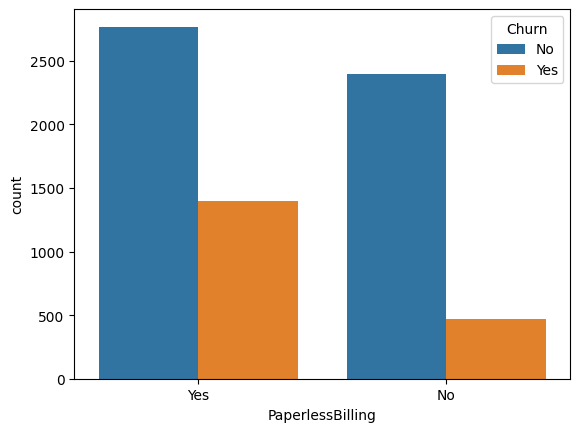

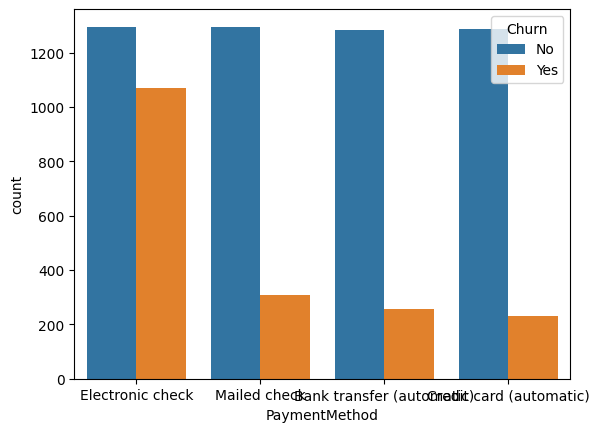

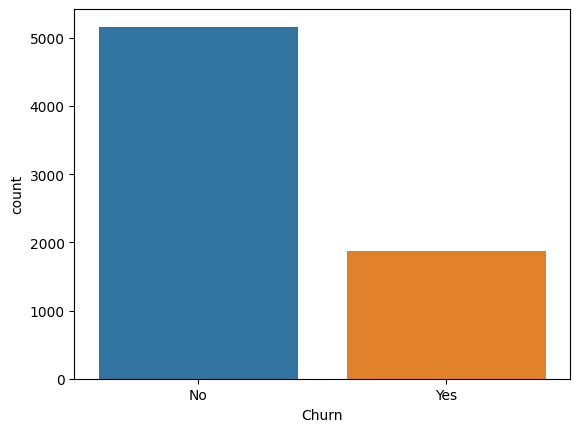

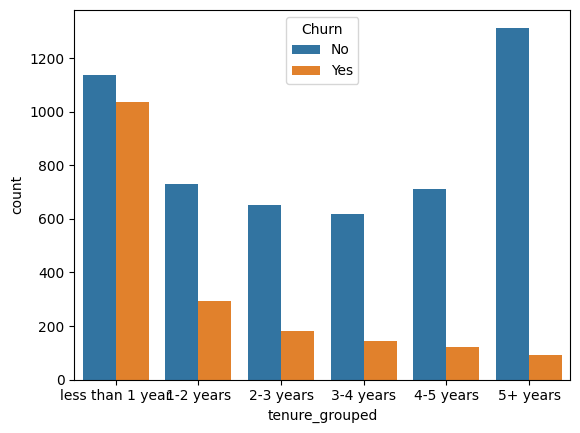

In [27]:
for i, predictor in enumerate(churn_data.drop(columns= ['Tenure', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data= churn_data, x=predictor, hue= 'Churn')

Customers who are not senior citizens are more likely to churn

Customers who have partners are more likely to stay however customers who have no partners are more likely to churn

Customers who have no dependents are more likely to churn

Customers who have phone service are more likely to churn

Customers who have fiber optics are more likely to churn

Customers who have no online security are more likely to churn

Customers who have no online backup are more likely to churn

Customers who have no device protection are more likely to churn

Customers who have no tech support are more likely to churn

Customers who have month-to-month contracts are more likely to churn

Customers who receive paperless billing are more likely to churn

Customers who use electronic check payment method are more likely to churn

Customers who have used the network for less than a year are more likely to churn

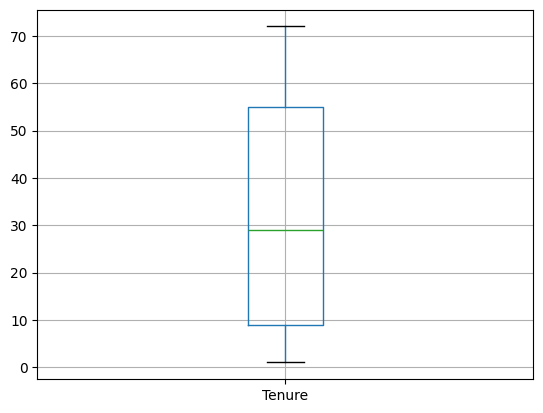

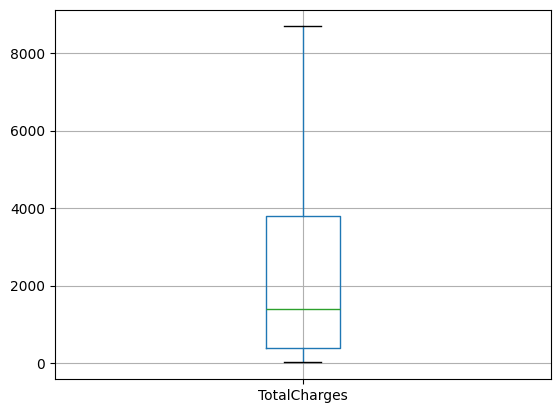

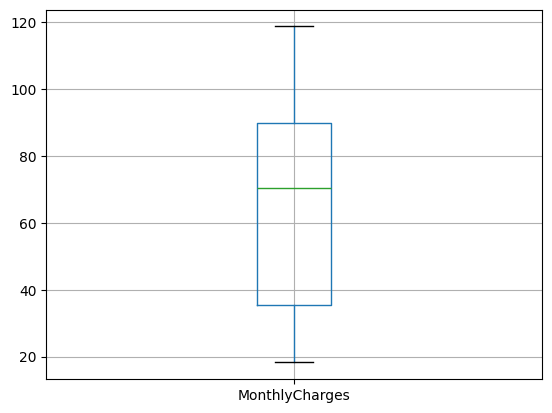

In [28]:
for i, record in enumerate(churn_data[['Tenure', 'TotalCharges','MonthlyCharges']]):
    plt.figure(i)
    churn_data.boxplot( column = record)

In [29]:
churn_data['InternetService'].value_counts()/len(churn_data) * 100

InternetService
Fiber optic    44.027304
DSL            34.357224
No             21.615472
Name: count, dtype: float64

In [30]:
churn_data[churn_data['Churn']== 'Yes']['InternetService'].value_counts()/len(churn_data[churn_data['Churn']=='Yes']) * 100

InternetService
Fiber optic    69.395399
DSL            24.558587
No              6.046014
Name: count, dtype: float64

In [31]:
churn_data[churn_data['Churn']== 'Yes']['InternetService'].value_counts()

InternetService
Fiber optic    1297
DSL             459
No              113
Name: count, dtype: int64

In [32]:
churn_data['OnlineSecurity'].value_counts()/len(churn_data) * 100

OnlineSecurity
No                     49.729807
Yes                    28.654721
No internet service    21.615472
Name: count, dtype: float64

In [33]:
churn_data[churn_data['Churn']== 'Yes']['OnlineSecurity'].value_counts()/len(churn_data[churn_data['Churn']=='Yes']) * 100

OnlineSecurity
No                     78.170144
Yes                    15.783842
No internet service     6.046014
Name: count, dtype: float64

In [34]:
churn_data[churn_data['Churn']== 'Yes']['OnlineSecurity'].value_counts()

OnlineSecurity
No                     1461
Yes                     295
No internet service     113
Name: count, dtype: int64

In [35]:
churn_data['OnlineBackup'].value_counts()/len(churn_data) * 100

OnlineBackup
No                     43.899317
Yes                    34.485210
No internet service    21.615472
Name: count, dtype: float64

In [36]:
churn_data[churn_data['Churn']== 'Yes']['OnlineBackup'].value_counts()/len(churn_data[churn_data['Churn']=='Yes']) * 100

OnlineBackup
No                     65.971108
Yes                    27.982879
No internet service     6.046014
Name: count, dtype: float64

In [37]:
churn_data['TechSupport'].value_counts()/len(churn_data) * 100

TechSupport
No                     49.374289
Yes                    29.010239
No internet service    21.615472
Name: count, dtype: float64

In [38]:
churn_data[churn_data['Churn']== 'Yes']['TechSupport'].value_counts()/len(churn_data[churn_data['Churn']=='Yes']) * 100

TechSupport
No                     77.367576
Yes                    16.586410
No internet service     6.046014
Name: count, dtype: float64

In [39]:
churn_data['DeviceProtection'].value_counts()/len(churn_data) * 100

DeviceProtection
No                     43.998862
Yes                    34.385666
No internet service    21.615472
Name: count, dtype: float64

In [40]:
churn_data[churn_data['Churn']== 'Yes']['DeviceProtection'].value_counts()/len(churn_data[churn_data['Churn']=='Yes']) * 100

DeviceProtection
No                     64.794007
Yes                    29.159979
No internet service     6.046014
Name: count, dtype: float64

In [41]:
churn_data[churn_data['Churn']== 'No']['Contract'].value_counts()/(len(churn_data) * 100)

Contract
Month-to-month    0.003157
Two year          0.002328
One year          0.001857
Name: count, dtype: float64

Text(0.5, 0, 'Number of Customers')

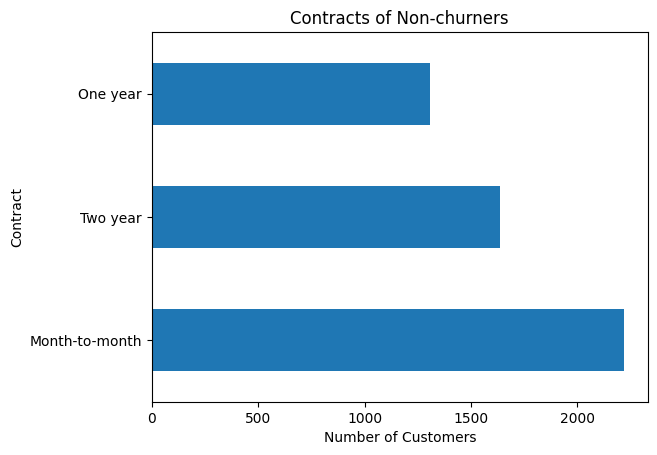

In [42]:
churn_data[churn_data['Churn']== 'No']['Contract'].value_counts().plot(kind= 'barh');
plt.title('Contracts of Non-churners')
plt.xlabel('Number of Customers')

In [43]:
churn_data[churn_data['Churn']== 'Yes']['Contract'].value_counts()/len(churn_data) * 100

Contract
Month-to-month    23.535267
One year           2.360637
Two year           0.682594
Name: count, dtype: float64

Text(0.5, 0, 'Number of Customers')

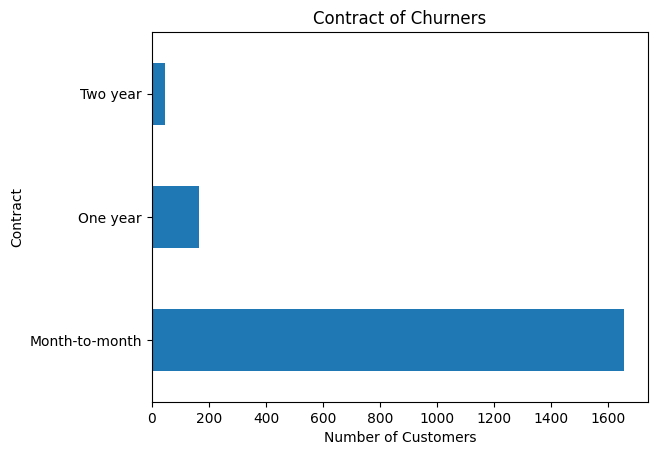

In [44]:
churn_data[churn_data['Churn']== 'Yes']['Contract'].value_counts().plot(kind= 'barh');
plt.title('Contract of Churners')
plt.xlabel('Number of Customers')

In [45]:
churn_data['tenure_grouped'].value_counts()/len(churn_data)* 100

tenure_grouped
less than 1 year    30.930034
5+ years            20.008532
1-2 years           14.562002
2-3 years           11.831627
4-5 years           11.831627
3-4 years           10.836177
Name: count, dtype: float64

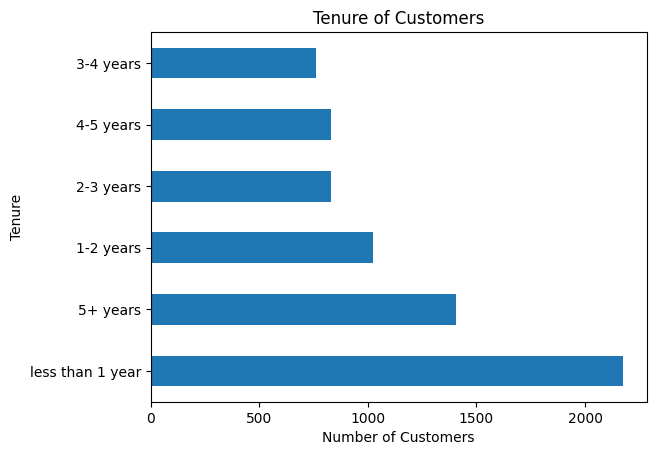

In [46]:
churn_data['tenure_grouped'].value_counts().plot(kind = 'barh');
plt.title('Tenure of Customers')
plt.ylabel('Tenure')
plt.xlabel('Number of Customers');

In [47]:
churn_data[churn_data['Churn']== 'No']['tenure_grouped'].value_counts()/len(churn_data) * 100

tenure_grouped
5+ years            18.686007
less than 1 year    16.183163
1-2 years           10.381115
4-5 years           10.125142
2-3 years            9.271900
3-4 years            8.774175
Name: count, dtype: float64

Text(0.5, 0, 'Number of Customers')

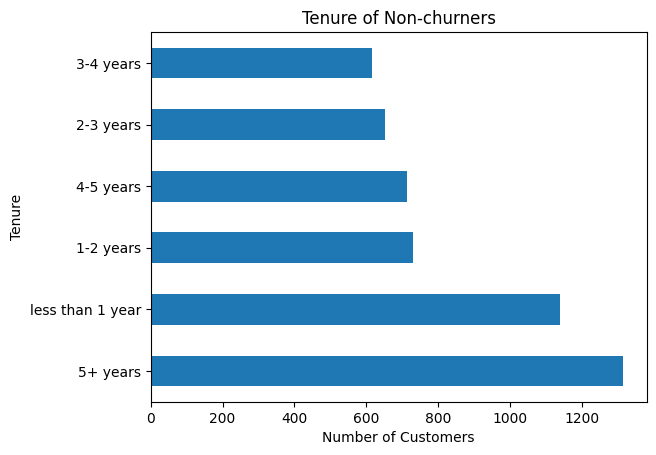

In [48]:
churn_data[churn_data['Churn']== 'No']['tenure_grouped'].value_counts().plot(kind = 'barh');
plt.title('Tenure of Non-churners')
plt.ylabel('Tenure')
plt.xlabel('Number of Customers')

In [49]:
churn_data[churn_data['Churn']== 'Yes']['tenure_grouped'].value_counts()/len(churn_data) * 100

tenure_grouped
less than 1 year    14.746871
1-2 years            4.180887
2-3 years            2.559727
3-4 years            2.062002
4-5 years            1.706485
5+ years             1.322526
Name: count, dtype: float64

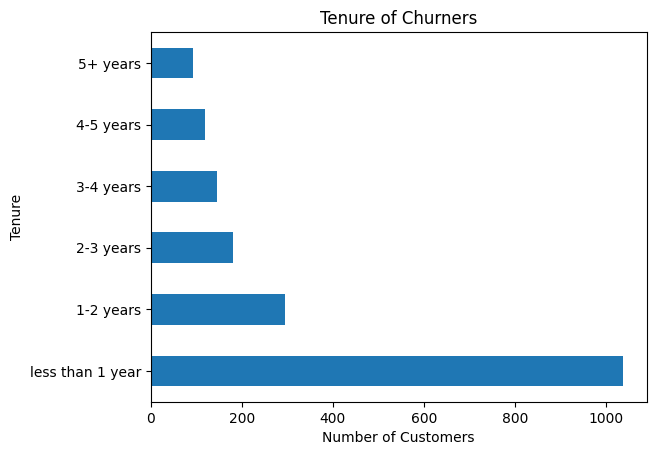

In [50]:
churn_data[churn_data['Churn']== 'Yes']['tenure_grouped'].value_counts().plot(kind = 'barh')
plt.title('Tenure of Churners')
plt.ylabel('Tenure')
plt.xlabel('Number of Customers');

In [59]:
len(churn_data[churn_data['Tenure']== 1])

613

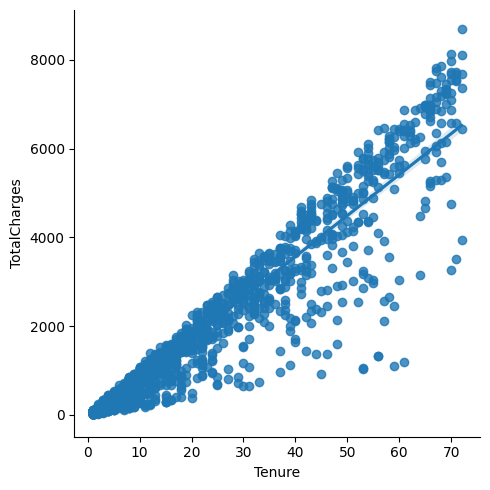

In [51]:
sns.lmplot(data = churn_data[churn_data['Churn'] == 'Yes'], x= 'Tenure', y= 'TotalCharges')

<Axes: xlabel='Tenure', ylabel='TotalCharges'>

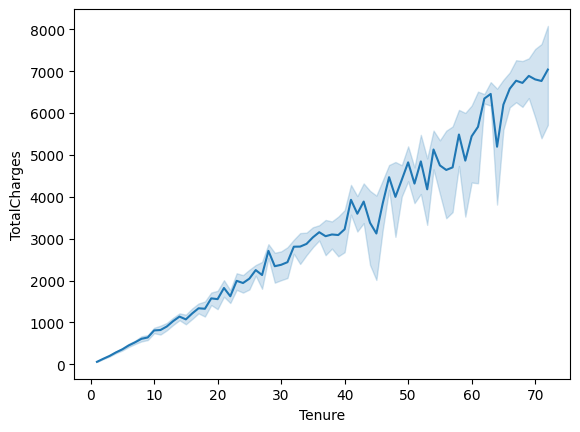

In [52]:
sns.lineplot(data = churn_data[churn_data['Churn'] == 'Yes'], x= 'Tenure', y= 'TotalCharges')

In [60]:
churn_data_dummy = pd.get_dummies(churn_data)
churn_data_dummy.head()

,Tenure,MonthlyCharges,TotalCharges,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,tenure_grouped_less than 1 year,tenure_grouped_1-2 years,tenure_grouped_2-3 years,tenure_grouped_3-4 years,tenure_grouped_4-5 years,tenure_grouped_5+ years
0,1,29.85,29.85,True,False,True,False,False,True,True,...,True,False,True,False,True,False,False,False,False,False
1,34,56.95,1889.50,False,True,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,False
2,2,53.85,108.15,False,True,True,False,True,False,True,...,False,True,False,True,True,False,False,False,False,False
3,45,42.30,1840.75,False,True,True,False,True,False,True,...,False,False,True,False,False,False,False,True,False,False
4,2,70.70,151.65,True,False,True,False,True,False,True,...,True,False,False,True,True,False,False,False,False,False


In [61]:
churn_data_dummy = churn_data_dummy.replace({True:1, False:0})
churn_data_dummy.head()

,Tenure,MonthlyCharges,TotalCharges,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,tenure_grouped_less than 1 year,tenure_grouped_1-2 years,tenure_grouped_2-3 years,tenure_grouped_3-4 years,tenure_grouped_4-5 years,tenure_grouped_5+ years
0,1,29.85,29.85,1,0,1,0,0,1,1,...,1,0,1,0,1,0,0,0,0,0
1,34,56.95,1889.50,0,1,1,0,1,0,1,...,0,1,1,0,0,0,1,0,0,0
2,2,53.85,108.15,0,1,1,0,1,0,1,...,0,1,0,1,1,0,0,0,0,0
3,45,42.30,1840.75,0,1,1,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
4,2,70.70,151.65,1,0,1,0,1,0,1,...,1,0,0,1,1,0,0,0,0,0


Relationship between Monthly Charges and Total Charges

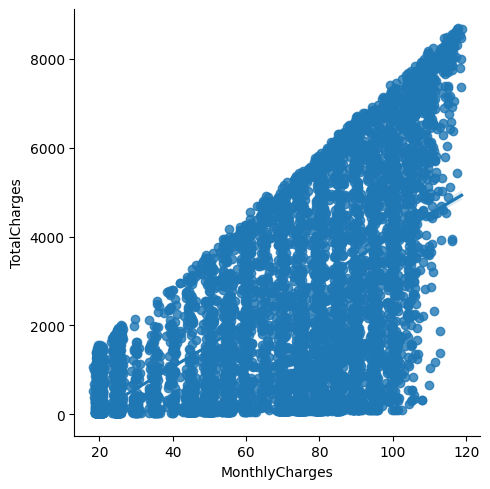

In [62]:
sns.lmplot(data= churn_data_dummy, x='MonthlyCharges', y= 'TotalCharges');

Total Charges increase as Monthly Charges increase - as expected

##### Exploring Churn by Monthly Charges and Total Charges

Text(0.5, 1.0, 'Monthly Charges by Churn')

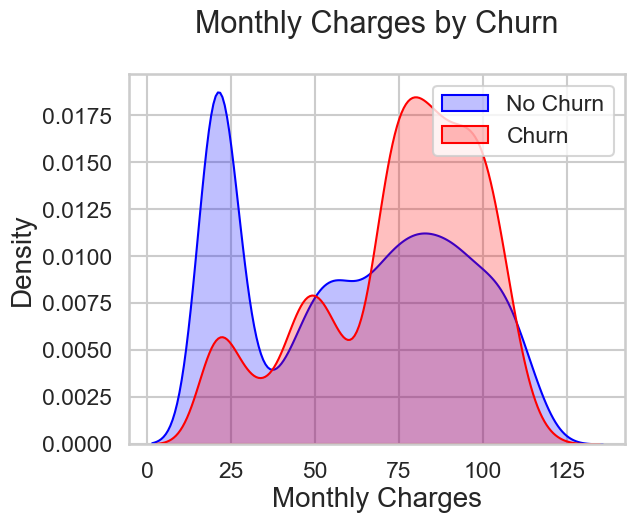

In [71]:
mth = sns.kdeplot(churn_data['MonthlyCharges'][(churn_data["Churn"] == 'No')], color = "Blue", fill = True)
mth = sns.kdeplot(churn_data['MonthlyCharges'][(churn_data["Churn"] == 'Yes')], ax = mth, color = "Red", fill = 'True')
mth.legend(["No Churn","Churn"], loc = "upper right")
mth.set_ylabel("Density")
mth.set_xlabel("Monthly Charges")
mth.set_title("Monthly Charges by Churn")

Insight: Customer churn is highest when monthly charges are high

Text(0.5, 1.0, 'Total Charges by Churn')

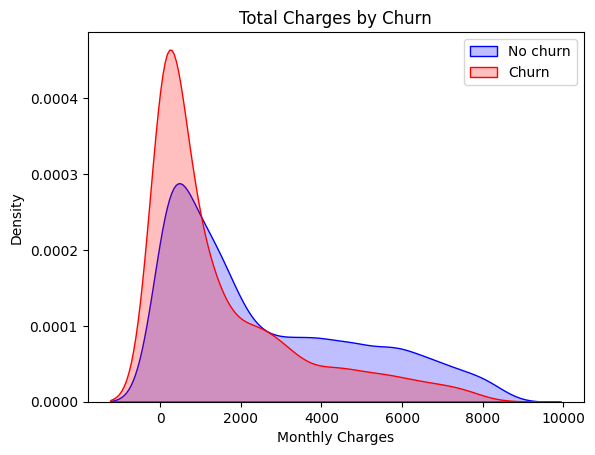

In [ ]:
mth = sns.kdeplot(churn_data2['TotalCharges'][(churn_data2['Churn']=='No')], color= 'Blue', fill = True)
mth = sns.kdeplot(churn_data2['TotalCharges'][(churn_data2['Churn']=='Yes')], color = 'Red', fill= True)
mth.legend(['No churn', 'Churn'])
mth.set_xlabel('Monthly Charges')
mth.set_ylabel('Density')
mth.set_title('Total Charges by Churn')

Surprising insight: customer churn is high at lower Total Charges

However combining the insights of 3 parameters ie. Tenure, Monthly Charges and Total Charges, realize Higher Monthly Charges at lower tenure results in Total Charges. Hence these 3 factors are linked to high churn  

Text(0.5, 1.0, 'Tenure by Churn')

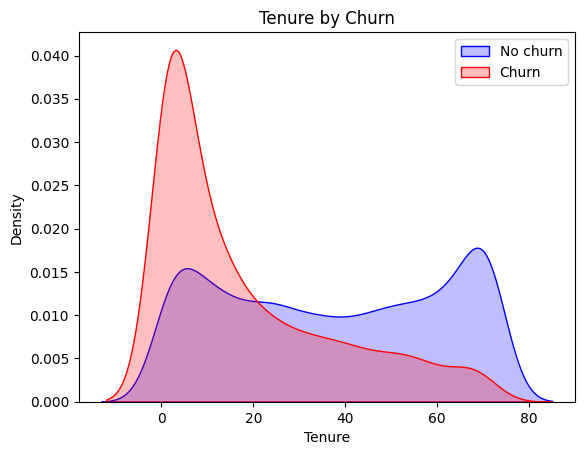

In [ ]:
mth = sns.kdeplot(churn_data['tenure'][(churn_data['Churn']=='No')], color= 'Blue', fill = True)
mth = sns.kdeplot(churn_data['tenure'][(churn_data['Churn']=='Yes')], color = 'Red', fill= True)
mth.legend(['No churn', 'Churn'])
mth.set_xlabel('Tenure')
mth.set_ylabel('Density')
mth.set_title('Tenure by Churn')

##### Correlation of all products with Churn

<Axes: >

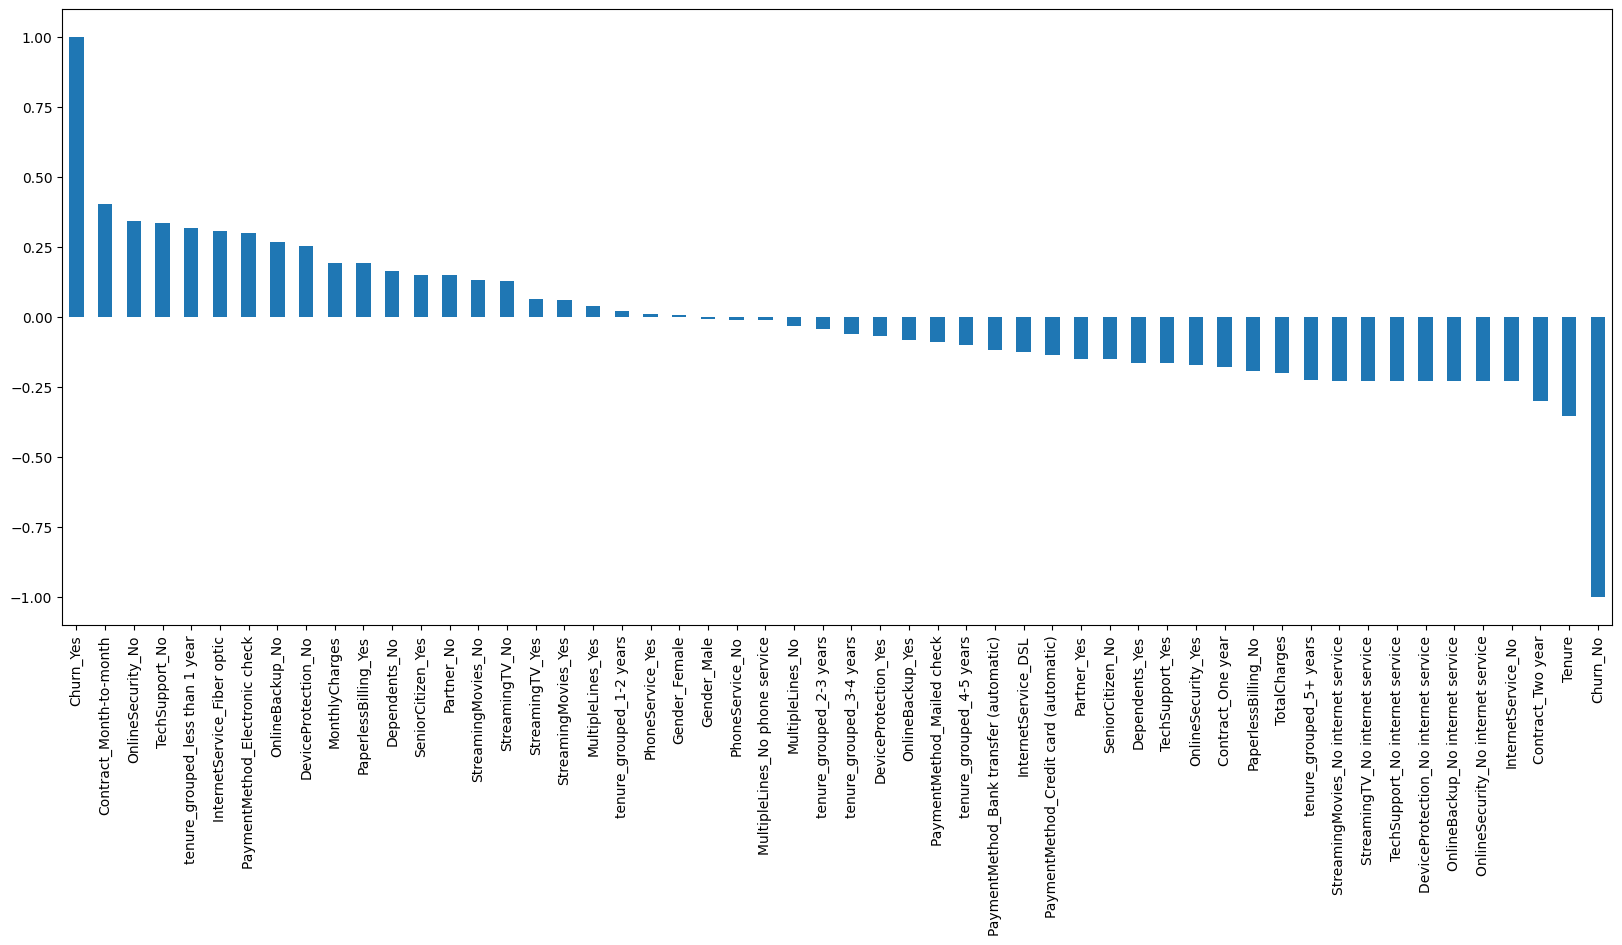

In [64]:
plt.figure(figsize = (20,8))
churn_data_dummy.corr()['Churn_Yes'].sort_values(ascending = False).plot(kind = 'bar')

HIGH Churn seen in case of Month to month contracts, No Online Security, No Tech Support, First year of subscription and Fibre Optic internet.

LOW Churn is seen in case of long term contracts, Subscriptions without internet service and customers engaged for 5+ years

<Axes: >

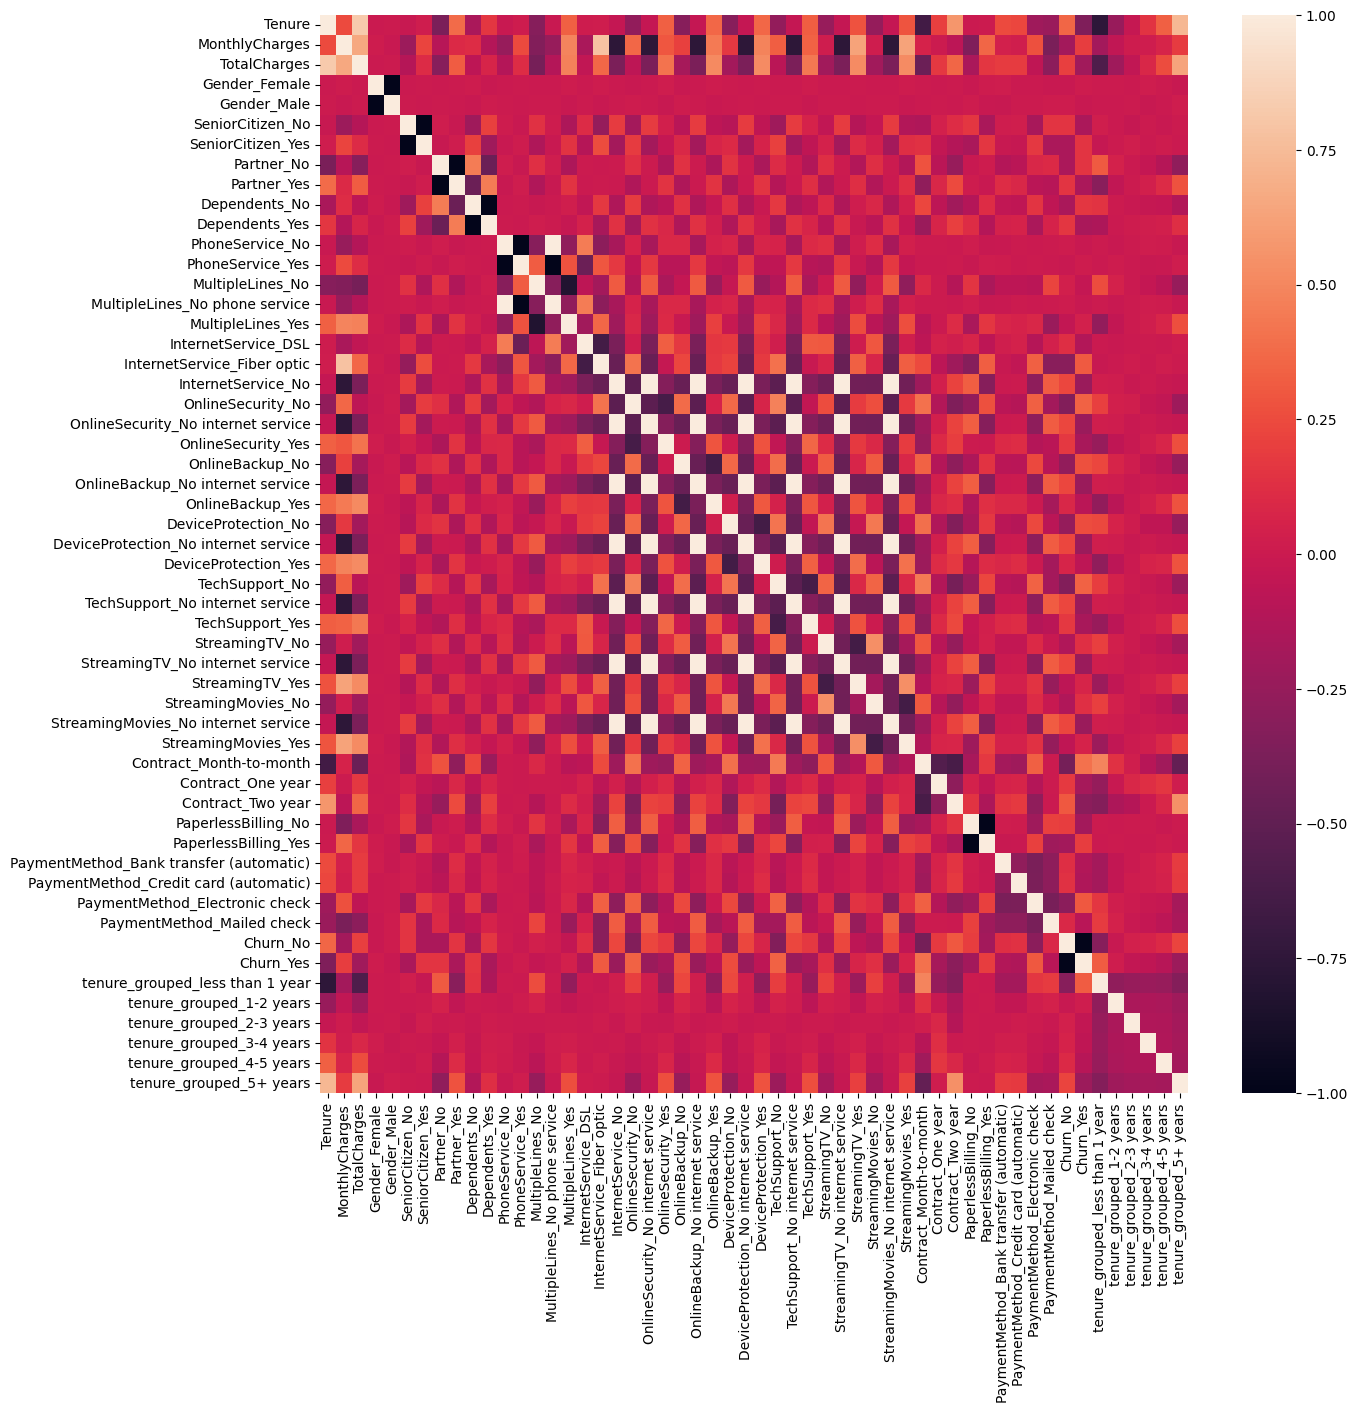

In [65]:
plt.figure(figsize = (14,14))
sns.heatmap(churn_data_dummy.corr())

#### Bivariate Analysis

In [66]:
churners_data= churn_data_dummy.loc[churn_data_dummy['Churn_Yes']== 1]
non_churners_data = churn_data_dummy.loc[churn_data_dummy['Churn_Yes']==0]

In [67]:
churners_data

,Tenure,MonthlyCharges,TotalCharges,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,tenure_grouped_less than 1 year,tenure_grouped_1-2 years,tenure_grouped_2-3 years,tenure_grouped_3-4 years,tenure_grouped_4-5 years,tenure_grouped_5+ years
2,2,53.85,108.15,0,1,1,0,1,0,1,...,0,1,0,1,1,0,0,0,0,0
4,2,70.70,151.65,1,0,1,0,1,0,1,...,1,0,0,1,1,0,0,0,0,0
5,8,99.65,820.50,1,0,1,0,1,0,1,...,1,0,0,1,1,0,0,0,0,0
8,28,104.80,3046.05,1,0,1,0,0,1,1,...,1,0,0,1,0,0,1,0,0,0
13,49,103.70,5036.30,0,1,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,12,59.80,727.80,0,1,1,0,1,0,1,...,1,0,0,1,1,0,0,0,0,0
7026,9,44.20,403.35,1,0,1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0
7032,1,75.75,75.75,0,1,0,1,1,0,1,...,1,0,0,1,1,0,0,0,0,0
7034,67,102.95,6886.25,1,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1


In [68]:
def uniplot(df, col, title, hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    temp = pd.Series(data = hue)
    fig, ax =plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks([0,1], ['No','Yes'])
    plt.yscale('linear')
    plt.title(title)
    ax = sns.countplot(data = df, x = col, hue = hue,palette = 'bright')
    
    return fig, ax


(<Figure size 1300x800 with 1 Axes>,
 <Axes: title={'center': 'Distribution of Gender for Churned Customers'}, xlabel='Partner_Yes', ylabel='count'>)

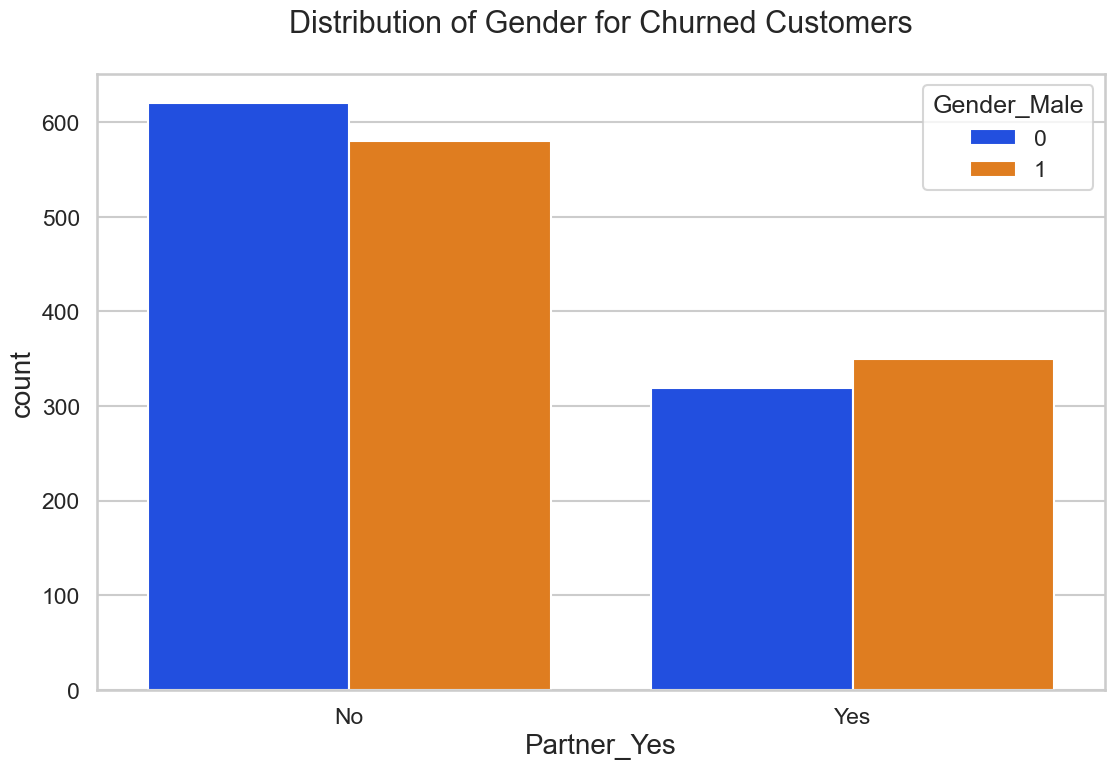

In [74]:
uniplot(churners_data, col= 'Partner_Yes', title= 'Distribution of Gender for Churned Customers', hue='Gender_Male')

(<Figure size 1300x800 with 1 Axes>,
 <Axes: title={'center': 'Distribution of Gender for Non Churned Customers'}, xlabel='Partner_Yes', ylabel='count'>)

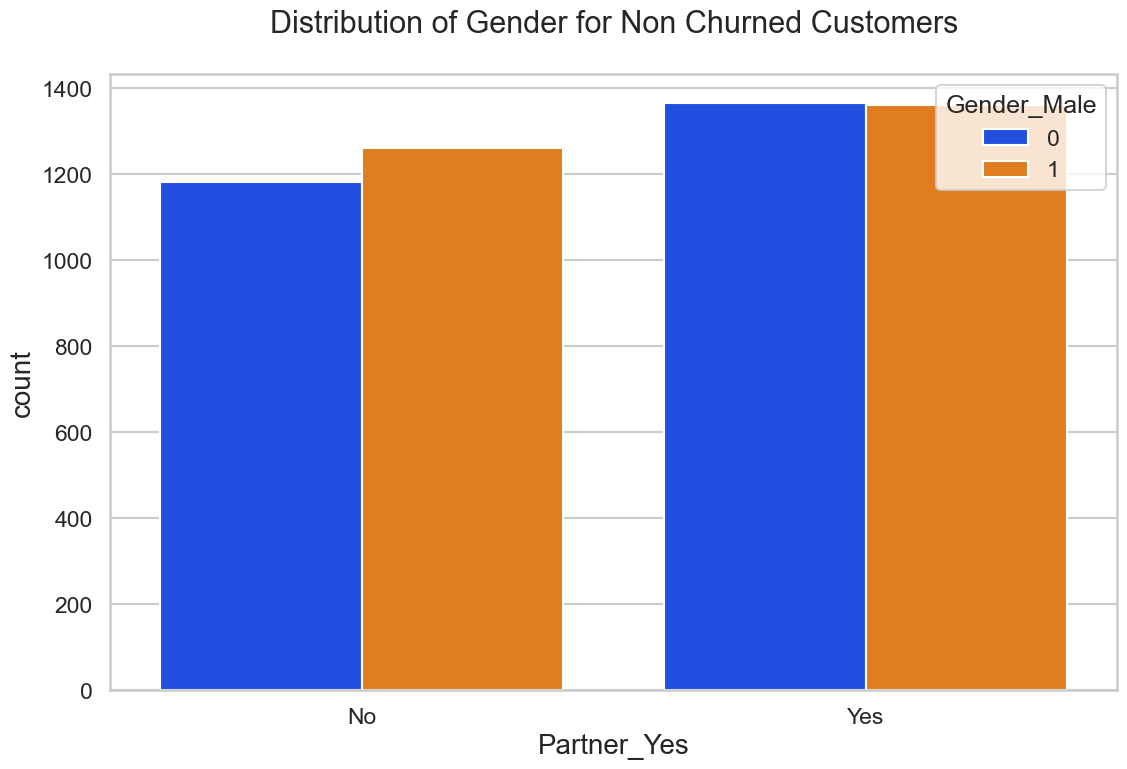

In [75]:
uniplot(non_churners_data, col= 'Partner_Yes', title= 'Distribution of Gender for Non Churned Customers', hue='Gender_Male')

KeyError: 'SeniorCitizen'

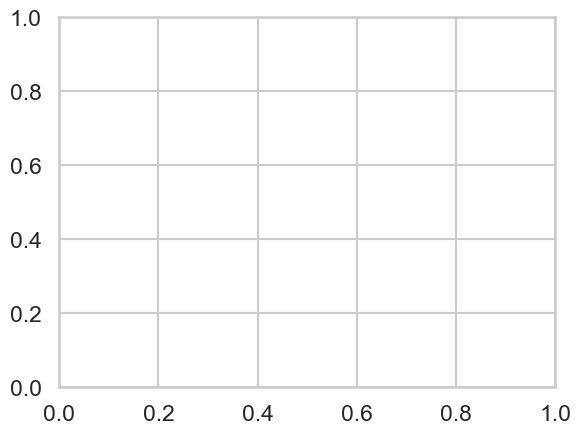

In [76]:
uniplot(churners_data, col= 'SeniorCitizen', title= 'Distribution of Senior Citizenship for Churned Customers', hue='Gender_Male')

KeyError: 'SeniorCitizen'

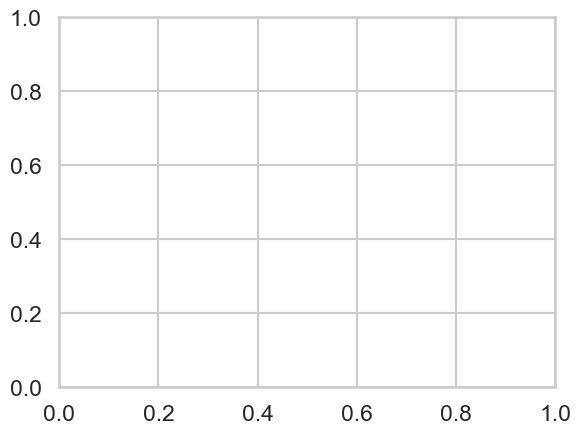

In [77]:
uniplot(non_churners_data, col= 'SeniorCitizen', title= 'Distribution of Senior Citizenship for Non Churned Customers', hue='Gender_Male')

(<Figure size 1300x800 with 1 Axes>,
 <Axes: title={'center': 'Distribution of Dependents for Churned Customers'}, xlabel='Dependents_Yes', ylabel='count'>)

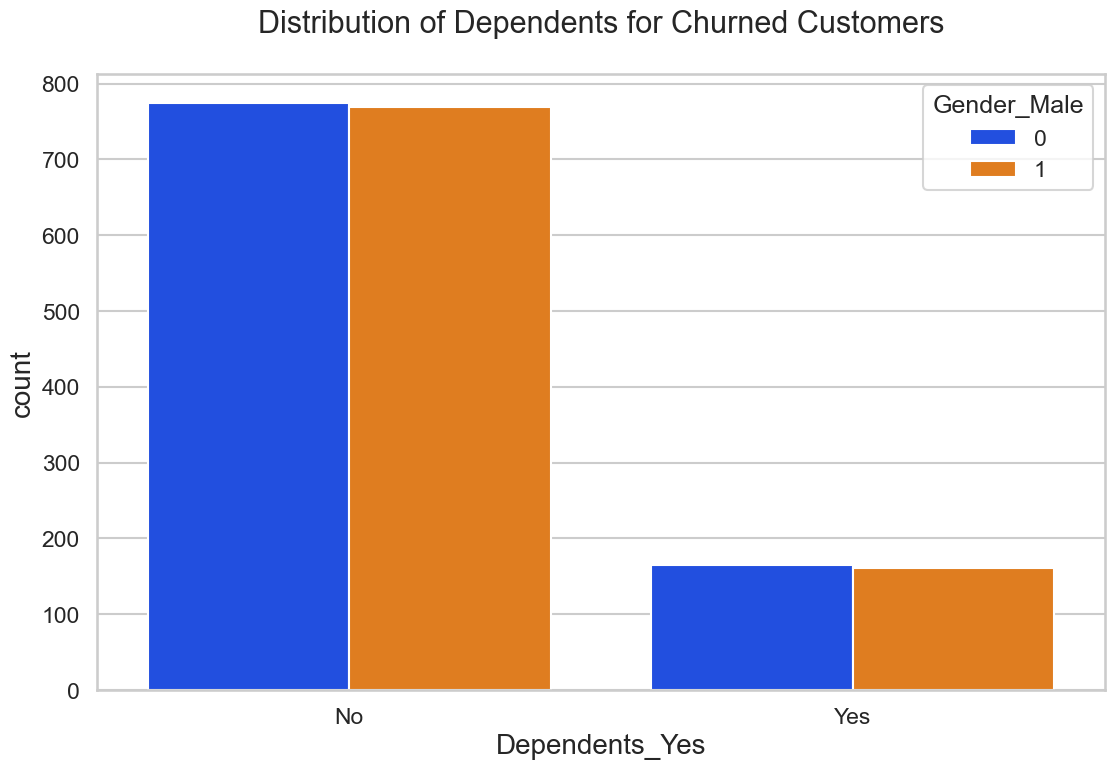

In [78]:
uniplot(churners_data, col= 'Dependents_Yes', title= 'Distribution of Dependents for Churned Customers', hue='Gender_Male')

(<Figure size 1300x800 with 1 Axes>,
 <Axes: title={'center': 'Distribution of Dependents for Non Churned Customers'}, xlabel='Dependents_Yes', ylabel='count'>)

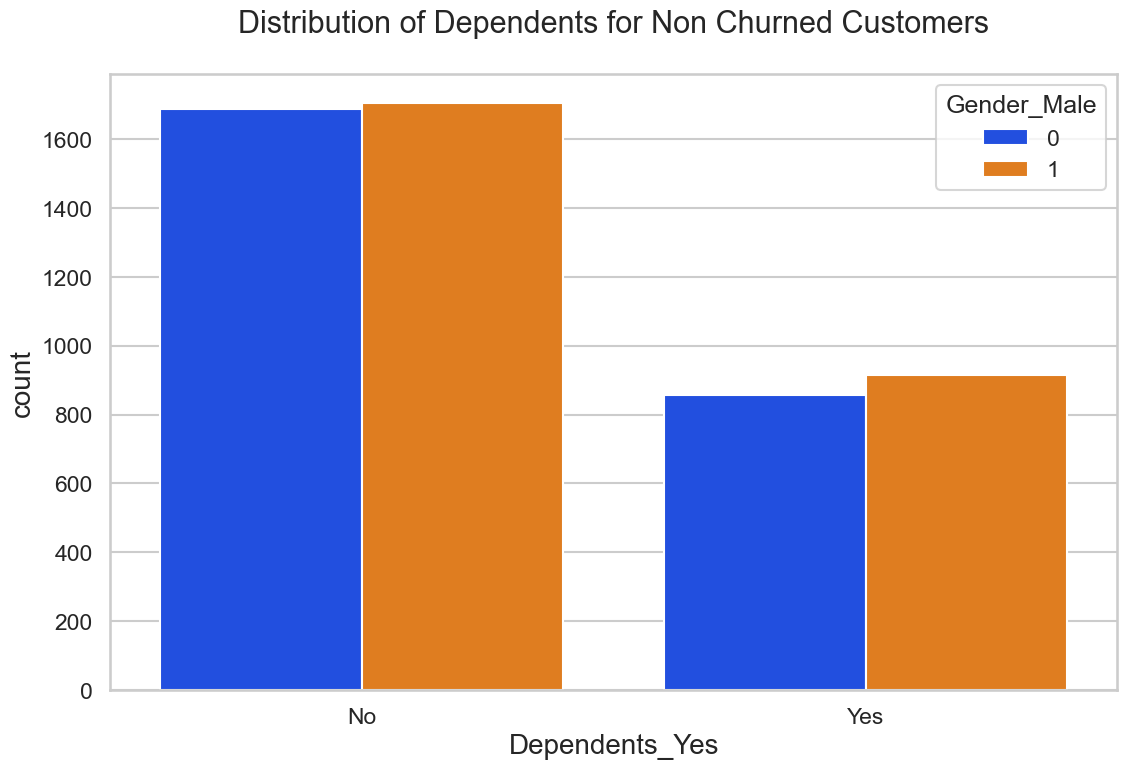

In [79]:
uniplot(non_churners_data, col= 'Dependents_Yes', title= 'Distribution of Dependents for Non Churned Customers', hue='Gender_Male')

(<Figure size 1300x800 with 1 Axes>,
 <Axes: title={'center': 'Distribution of Phone service users for Churned Customers'}, xlabel='PhoneService_Yes', ylabel='count'>)

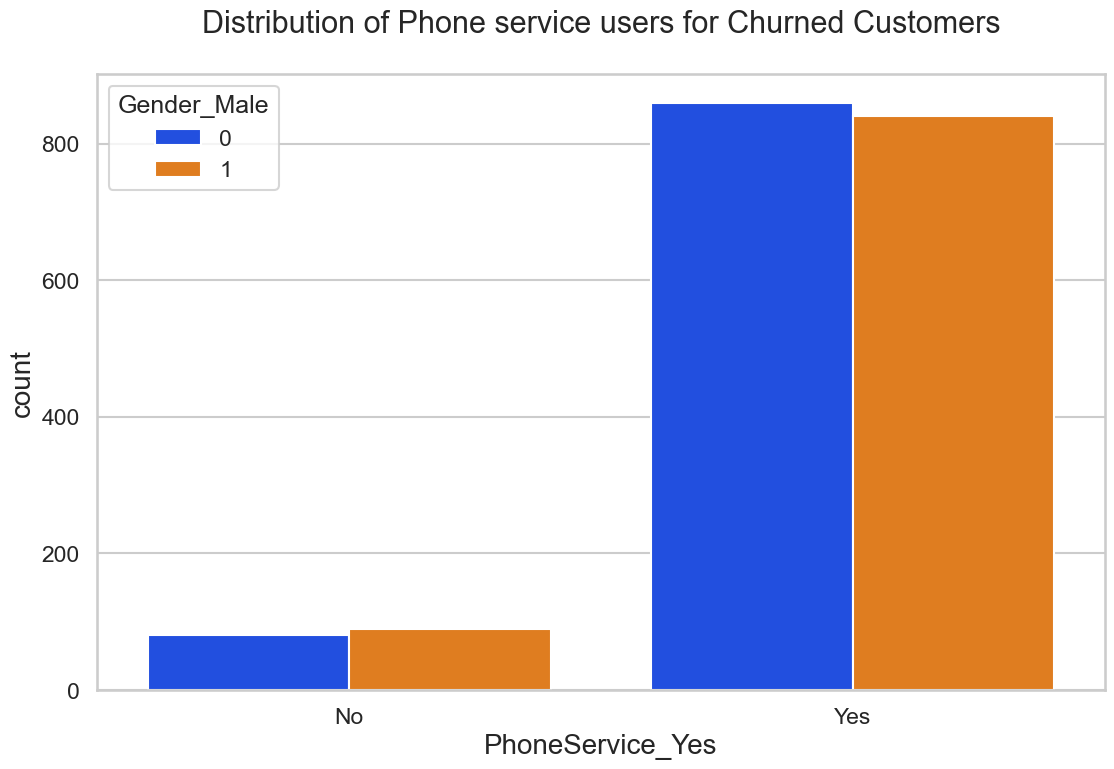

In [80]:
uniplot(churners_data, col= 'PhoneService_Yes', title= 'Distribution of Phone service users for Churned Customers', hue='Gender_Male')

(<Figure size 1300x800 with 1 Axes>,
 <Axes: title={'center': 'Distribution of Phone service users for Non Churned Customers'}, xlabel='PhoneService_Yes', ylabel='count'>)

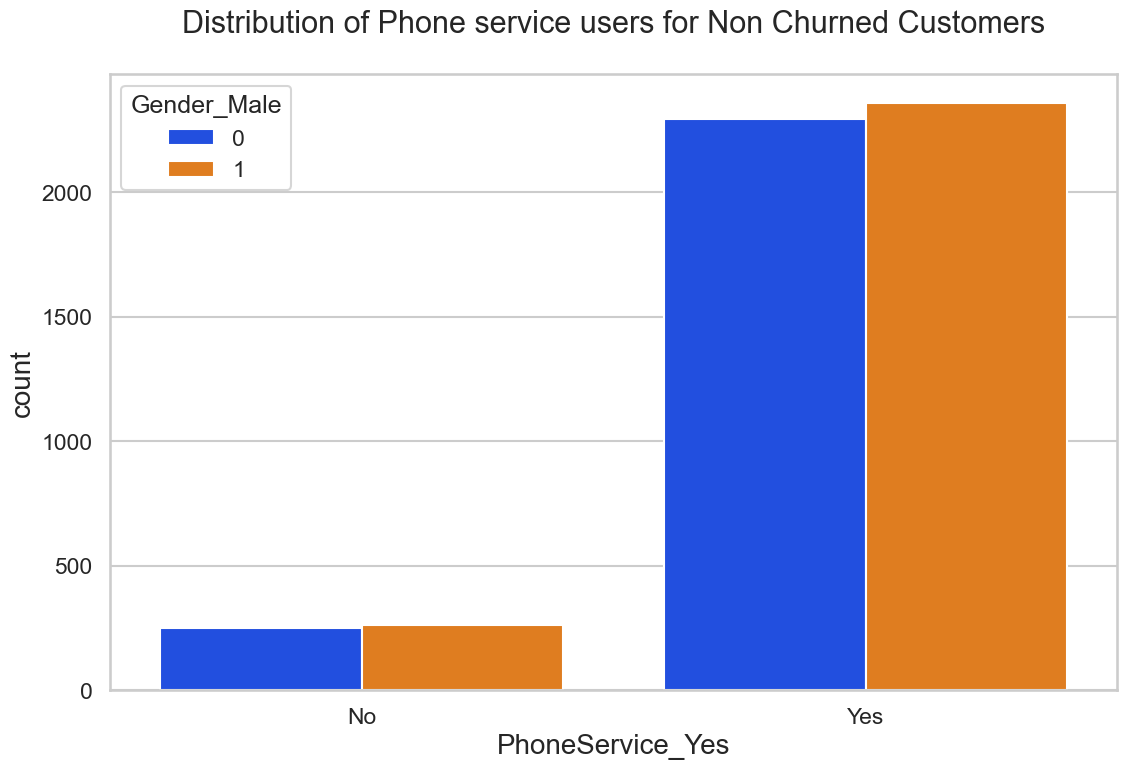

In [81]:
uniplot(non_churners_data, col= 'PhoneService_Yes', title= 'Distribution of Phone service users for Non Churned Customers', hue='Gender_Male')

(<Figure size 1300x800 with 1 Axes>,
 <Axes: title={'center': 'Distribution of Payment Method for Non Churned Customers'}, xlabel='PaymentMethod_Credit card (automatic)', ylabel='count'>)

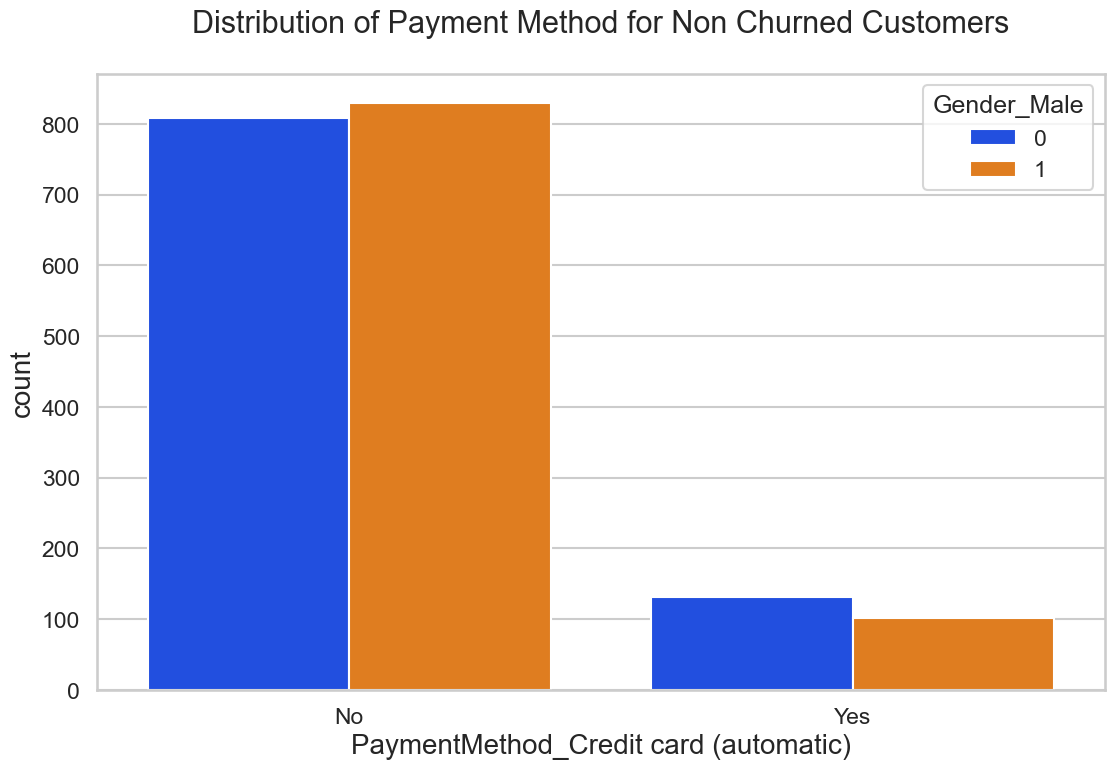

In [82]:
uniplot(churners_data, col= 'PaymentMethod_Credit card (automatic)', title= 'Distribution of Payment Method for Non Churned Customers', hue='Gender_Male')

(<Figure size 1300x800 with 1 Axes>,
 <Axes: title={'center': 'Distribution of Payment Method for Non Churned Customers'}, xlabel='PaymentMethod_Bank transfer (automatic)', ylabel='count'>)

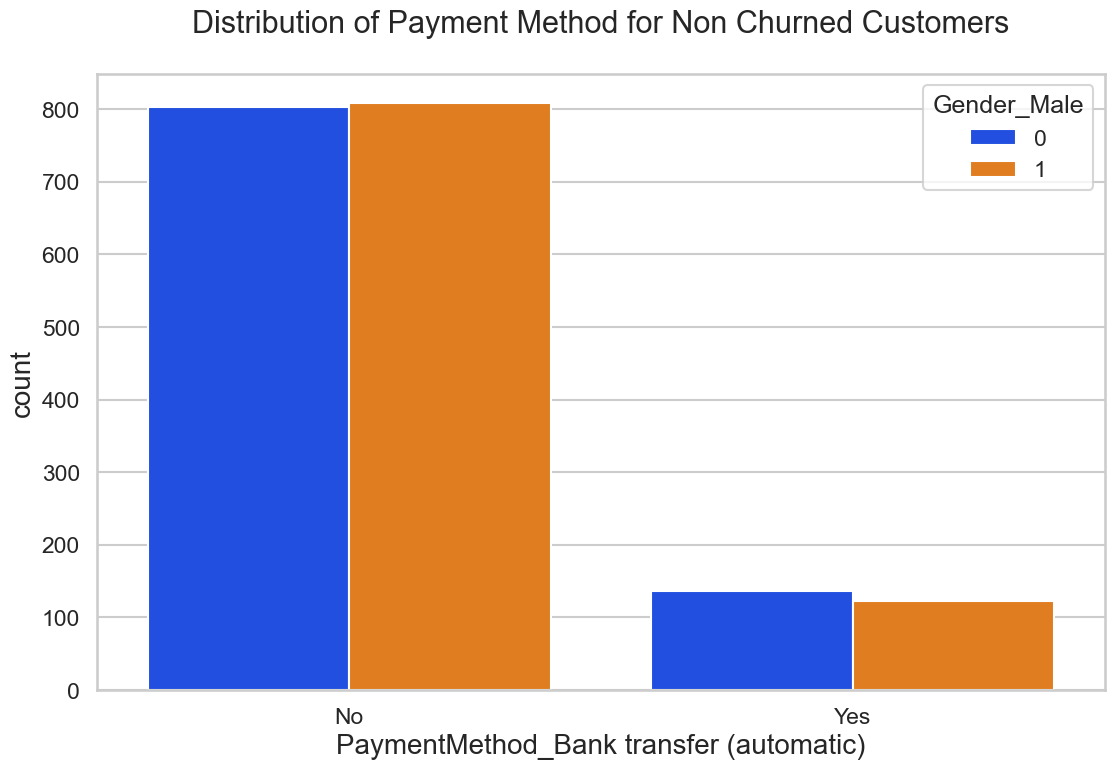

In [83]:
uniplot(churners_data, col= 'PaymentMethod_Bank transfer (automatic)', title= 'Distribution of Payment Method for Non Churned Customers', hue='Gender_Male')

(<Figure size 1300x800 with 1 Axes>,
 <Axes: title={'center': 'Distribution of Senior Citizenship for Churn Customers'}, xlabel='Partner_Yes', ylabel='count'>)

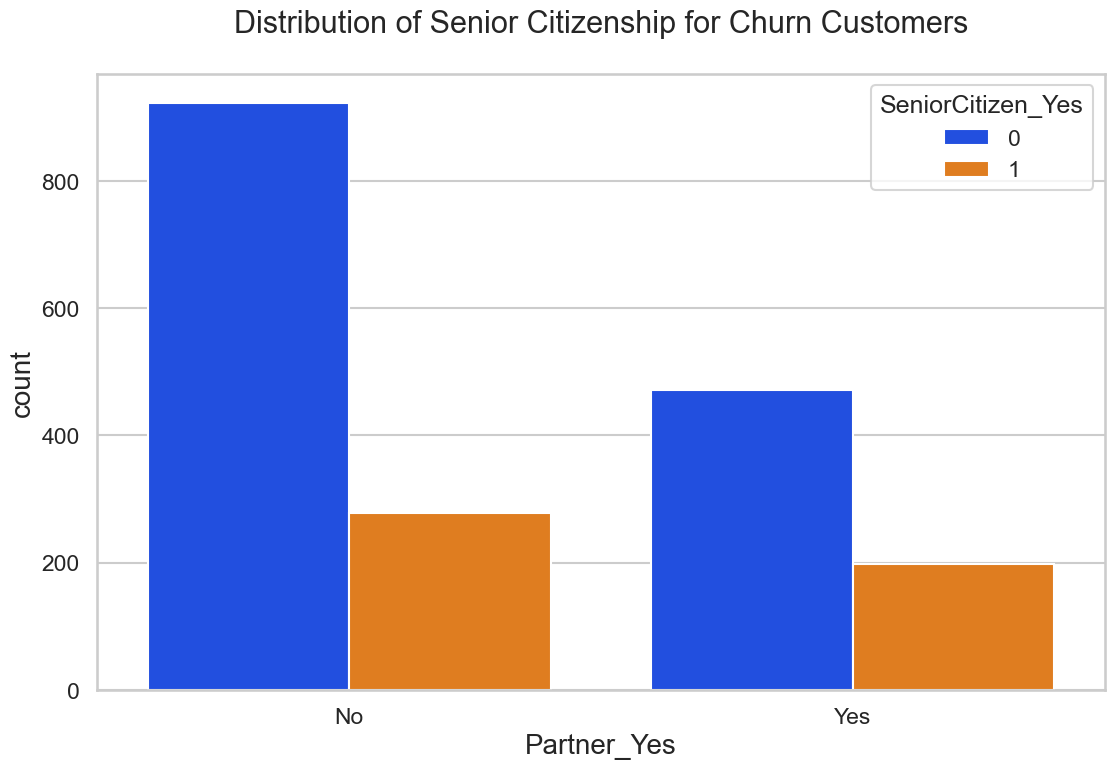

In [85]:
uniplot(churners_data, col= 'Partner_Yes', title= 'Distribution of Senior Citizenship for Churn Customers', hue='SeniorCitizen_Yes')

Non-senior citizens who do not have partners are more likely to churn   

(<Figure size 1300x800 with 1 Axes>,
 <Axes: title={'center': 'Distribution of Senior Citizenship for Non Churn Customers'}, xlabel='Partner_Yes', ylabel='count'>)

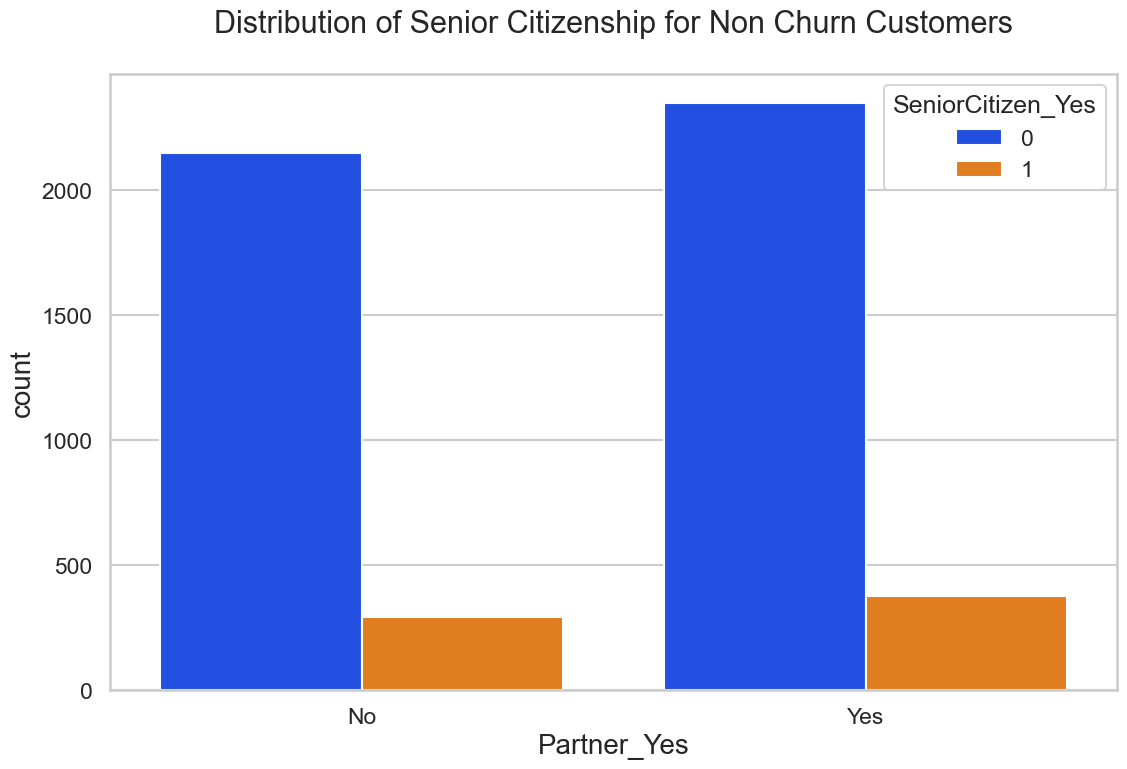

In [86]:
uniplot(non_churners_data, col= 'Partner_Yes', title= 'Distribution of Senior Citizenship for Non Churn Customers', hue='SeniorCitizen_Yes')

There is no significant insight in the distribution of non churn senior citizens with or without partners. 

(<Figure size 1300x800 with 1 Axes>,
 <Axes: title={'center': 'Distribution of Senior Citizenship for Non Churn Customers'}, xlabel='PhoneService_Yes', ylabel='count'>)

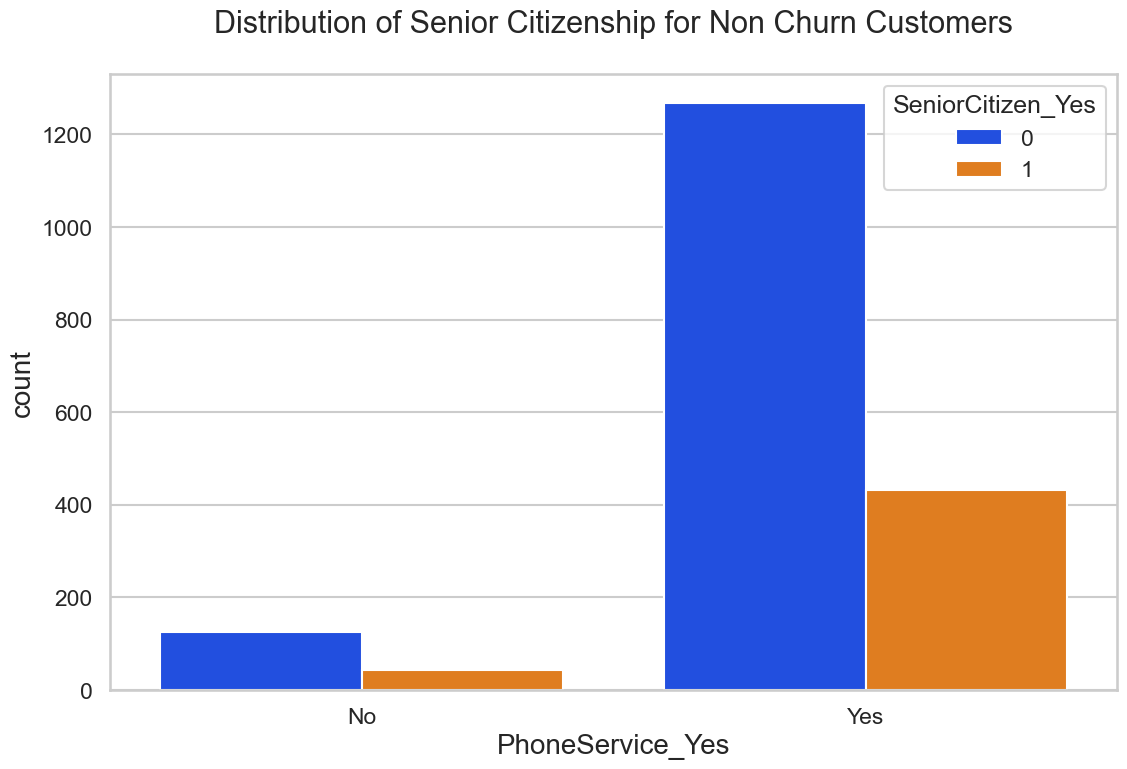

In [87]:
uniplot(churners_data, col= 'PhoneService_Yes', title= 'Distribution of Senior Citizenship for Non Churn Customers', hue='SeniorCitizen_Yes')

Non senior citizens who use phone service are high churners

(<Figure size 1300x800 with 1 Axes>,
 <Axes: title={'center': 'Distribution of Online security for Churn Customers'}, xlabel='Partner_Yes', ylabel='count'>)

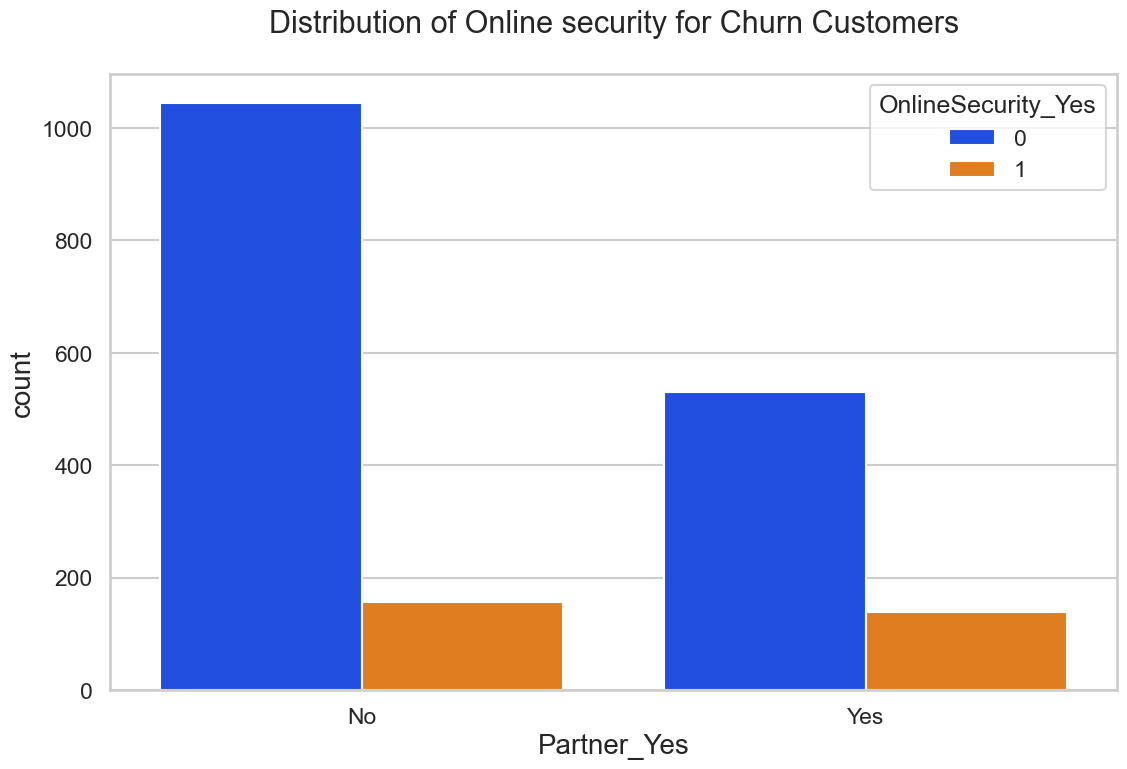

In [88]:
uniplot(churners_data, col= 'Partner_Yes', title= 'Distribution of Online security for Churn Customers', hue='OnlineSecurity_Yes')

Customers without Online security are generally high churners while customers without online security and without partners are slightly more likely to churn compared to those with partners

CONCLUSION

These are some insights from the exploration
1. Non senior citizens are high churners
2. Customers with No online security and No Tech Support are high churners

In [89]:
churn_data_dummy.to_csv('churnML_data.csv')